# Sample Analytics for the TNC trip data

All trips, starting November 2018, reported by Transportation Network Providers (sometimes called rideshare companies) to the City of Chicago as part of routine reporting required by ordinance.
Census Tracts are suppressed in some cases, and times are rounded to the nearest 15 minutes. Fares are rounded to the nearest \\$2.50 and tips are rounded to the nearest \\$1.00.

The files are saved in the form of python pickle file format which was downloaded from [here](https://data.cityofchicago.org/Transportation/Transportation-Network-Providers-Trips/m6dm-c72p). Present analysis only contains the subset of dataset from 10th March 2019 to 16th March 2019, i.e. one full week of the dataset.


In [4]:
import numpy as np
import pandas as pd
import os
import pickle
import datetime
import matplotlib.pyplot as plt
from IPython.display import Image
%matplotlib inline

In [34]:
infile = open("one_week.pkl", 'rb')

#infile = "../../../../tnc/Trips/trip_test.pkl"
df = pickle.load(infile)
infile.close()

A sample investigation into the data provides the following columns available which could be used for the further analysis. 

In [35]:
df.head()

Trip ID Trip Start Timestamp  \
16  5fa0cc351644ebdfe312bb8c893fd9dce4c8ed75  2019-03-12 14:15:00   
35  5fa0d65d6505d6a32c8043c87fcd1e57bd6a038c  2019-03-16 12:30:00   
42  5fa0da6a5df7c4da455a4028cbbc48aad8f70329  2019-03-11 07:00:00   
48  5fa0de3f6b2428a658e25364437765487acbae7a  2019-03-16 21:15:00   
56  5fa0e2081d4481c4cbd826e6b02c5fee49c5a613  2019-03-15 12:30:00   

    Trip End Timestamp  Trip Miles  Pickup Census Tract  Dropoff Census Tract  \
16 2019-03-12 14:30:00         1.5         1.703108e+10          1.703108e+10   
35 2019-03-16 12:45:00         7.1                  NaN                   NaN   
42 2019-03-11 07:15:00         2.1         1.703108e+10          1.703107e+10   
48 2019-03-16 21:30:00         5.7                  NaN                   NaN   
56 2019-03-15 12:45:00        11.3                  NaN                   NaN   

    Trip Total  Shared Trip Authorized  Trips Pooled  \
16    9.550000                   False             1   
35   20.049999                   False             1   
42    7.550000                   False             1   
48   10.000000                    True             1   
56   27.559999                   False             1   

    Pickup Centroid Latitude  Pickup Centroid Longitude  \
16                 41.892040                 -87.631866   
35                 41.946510                 -87.806023   
42                 41.900265                 -87.632111   
48                 41.740204                 -87.615967   
56                       NaN                        NaN   

    Dropoff Centroid Latitude  Dropoff Centroid Longitude  
16                  41.899155                  -87.626213  
35                  41.980263                  -87.913628  
42                  41.930580                  -87.642204  
48                  41.792358                  -87.617935  
56                  41.980263                  -87.913628

In [36]:
df = df.dropna(subset=['Pickup Centroid Latitude', 'Pickup Centroid Longitude', 'Dropoff Centroid Latitude', 'Dropoff Centroid Longitude'])
df['pooled'] = df['Trips Pooled'].apply(lambda x: 'Yes' if x>1 else 'No')
df['trip_dur'] = df['Trip End Timestamp'] - df['Trip Start Timestamp']
df['trip_dur'] = df['trip_dur']/np.timedelta64(1, 'm')

Let's do some basic exploratory analysis of the dataset. Following are the few pointers that we can see. 
1. Percentage of trips pooled 
2. Percentage of the trips that are authorized for the shared trips 
3. Distribution of the trip distance 
4. Distribution of the total trip cost

In [37]:
df['Shared Trip Authorized'].value_counts()/len(df)

False    0.747235
True     0.252765
Name: Shared Trip Authorized, dtype: float64

Aroud 74.72% of the trips are non-authorized for the shared trips which means that majority of the TNCs request are for the non-shared trips. The table below shows that around 7.3% of the trips which were authorised for pooling were not able to be matched.

In [38]:
pd.crosstab(df['pooled'], df['Shared Trip Authorized']).apply(lambda r: r/r.sum(), axis=1)

Shared Trip Authorized     False     True 
pooled                                    
No                      0.926805  0.073195
Yes                     0.000289  0.999711

In [39]:
df.describe()

Trip Miles  Pickup Census Tract  Dropoff Census Tract    Trip Total  \
count  2.108411e+06         1.685521e+06          1.685521e+06  2.108411e+06   
mean   4.677828e+00         1.714798e+10          1.714798e+10  1.287491e+01   
std    4.494465e+00         1.163297e+08          1.163284e+08  8.355762e+00   
min    0.000000e+00         1.703101e+10          1.703101e+10  7.200000e-01   
25%    1.600000e+00         1.703108e+10          1.703108e+10  7.550000e+00   
50%    3.200000e+00         1.703124e+10          1.703124e+10  1.005000e+01   
75%    6.000000e+00         1.703183e+10          1.703183e+10  1.505000e+01   
max    2.459000e+02         1.703198e+10          1.703198e+10  4.028500e+02   

       Trips Pooled  Pickup Centroid Latitude  Pickup Centroid Longitude  \
count  2.108411e+06              2.108411e+06               2.108411e+06   
mean   1.379657e+00              4.077803e+01              -8.577094e+01   
std    9.361253e-01              1.114952e+00               1.890870e+00   
min    1.000000e+00              4.165022e+01              -8.791363e+01   
25%    1.000000e+00              4.187741e+01              -8.767531e+01   
50%    1.000000e+00              4.189322e+01              -8.765131e+01   
75%    1.000000e+00              4.192862e+01              -8.763171e+01   
max    1.700000e+01              4.202122e+01              -8.753072e+01   

       Dropoff Centroid Latitude  Dropoff Centroid Longitude      trip_dur  
count               2.108411e+06                2.108411e+06  2.108411e+06  
mean                4.077871e+01               -8.577098e+01  1.658253e+01  
std                 1.115208e+00                1.891345e+00  1.307915e+01  
min                 4.165022e+01               -8.791363e+01  0.000000e+00  
25%                 4.187867e+01               -8.767509e+01  1.500000e+01  
50%                 4.189266e+01               -8.764991e+01  1.500000e+01  
75%                 4.192862e+01               -8.763171e+01  1.500000e+01  
max                 4.202122e+01               -8.752995e+01  7.050000e+02

The summary analysis shows that an *average* trip length is of **4.67 miles** annd the total average cost of the trips is **\\$12.87** and average duration of the trip is **16.58 minutes**.

[Text(0,0.5,'Frequency'), Text(0.5,1,'Frequency Histogram')]

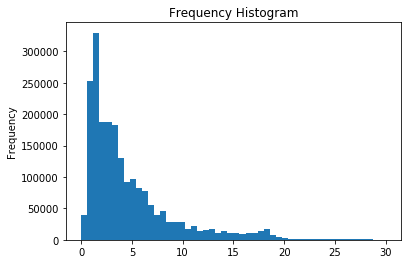

In [14]:
#plot histogram of trip distance 
plt.hist(df['Trip Miles'], bins= 50, range = [0, 30])
plt.gca().set(title='Frequency Histogram', ylabel = 'Frequency')

[Text(0,0.5,'Frequency'), Text(0.5,1,'Frequency Histogram')]

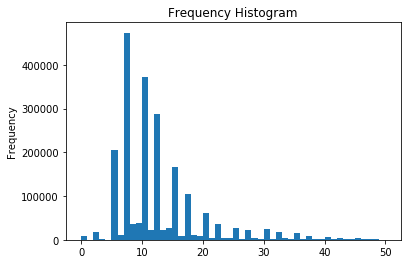

In [15]:
#plot histogram of trip fare 
plt.hist(df['Trip Total'], bins= 50, range = [0, 50])
plt.gca().set(title='Frequency Histogram', ylabel = 'Frequency')

In addition to these, the AM trip patterns for one day with source and destination could be visualized. An open source library [kepler.gl](https://github.com/keplergl/kepler.gl) has been used to plot the following pictures. 


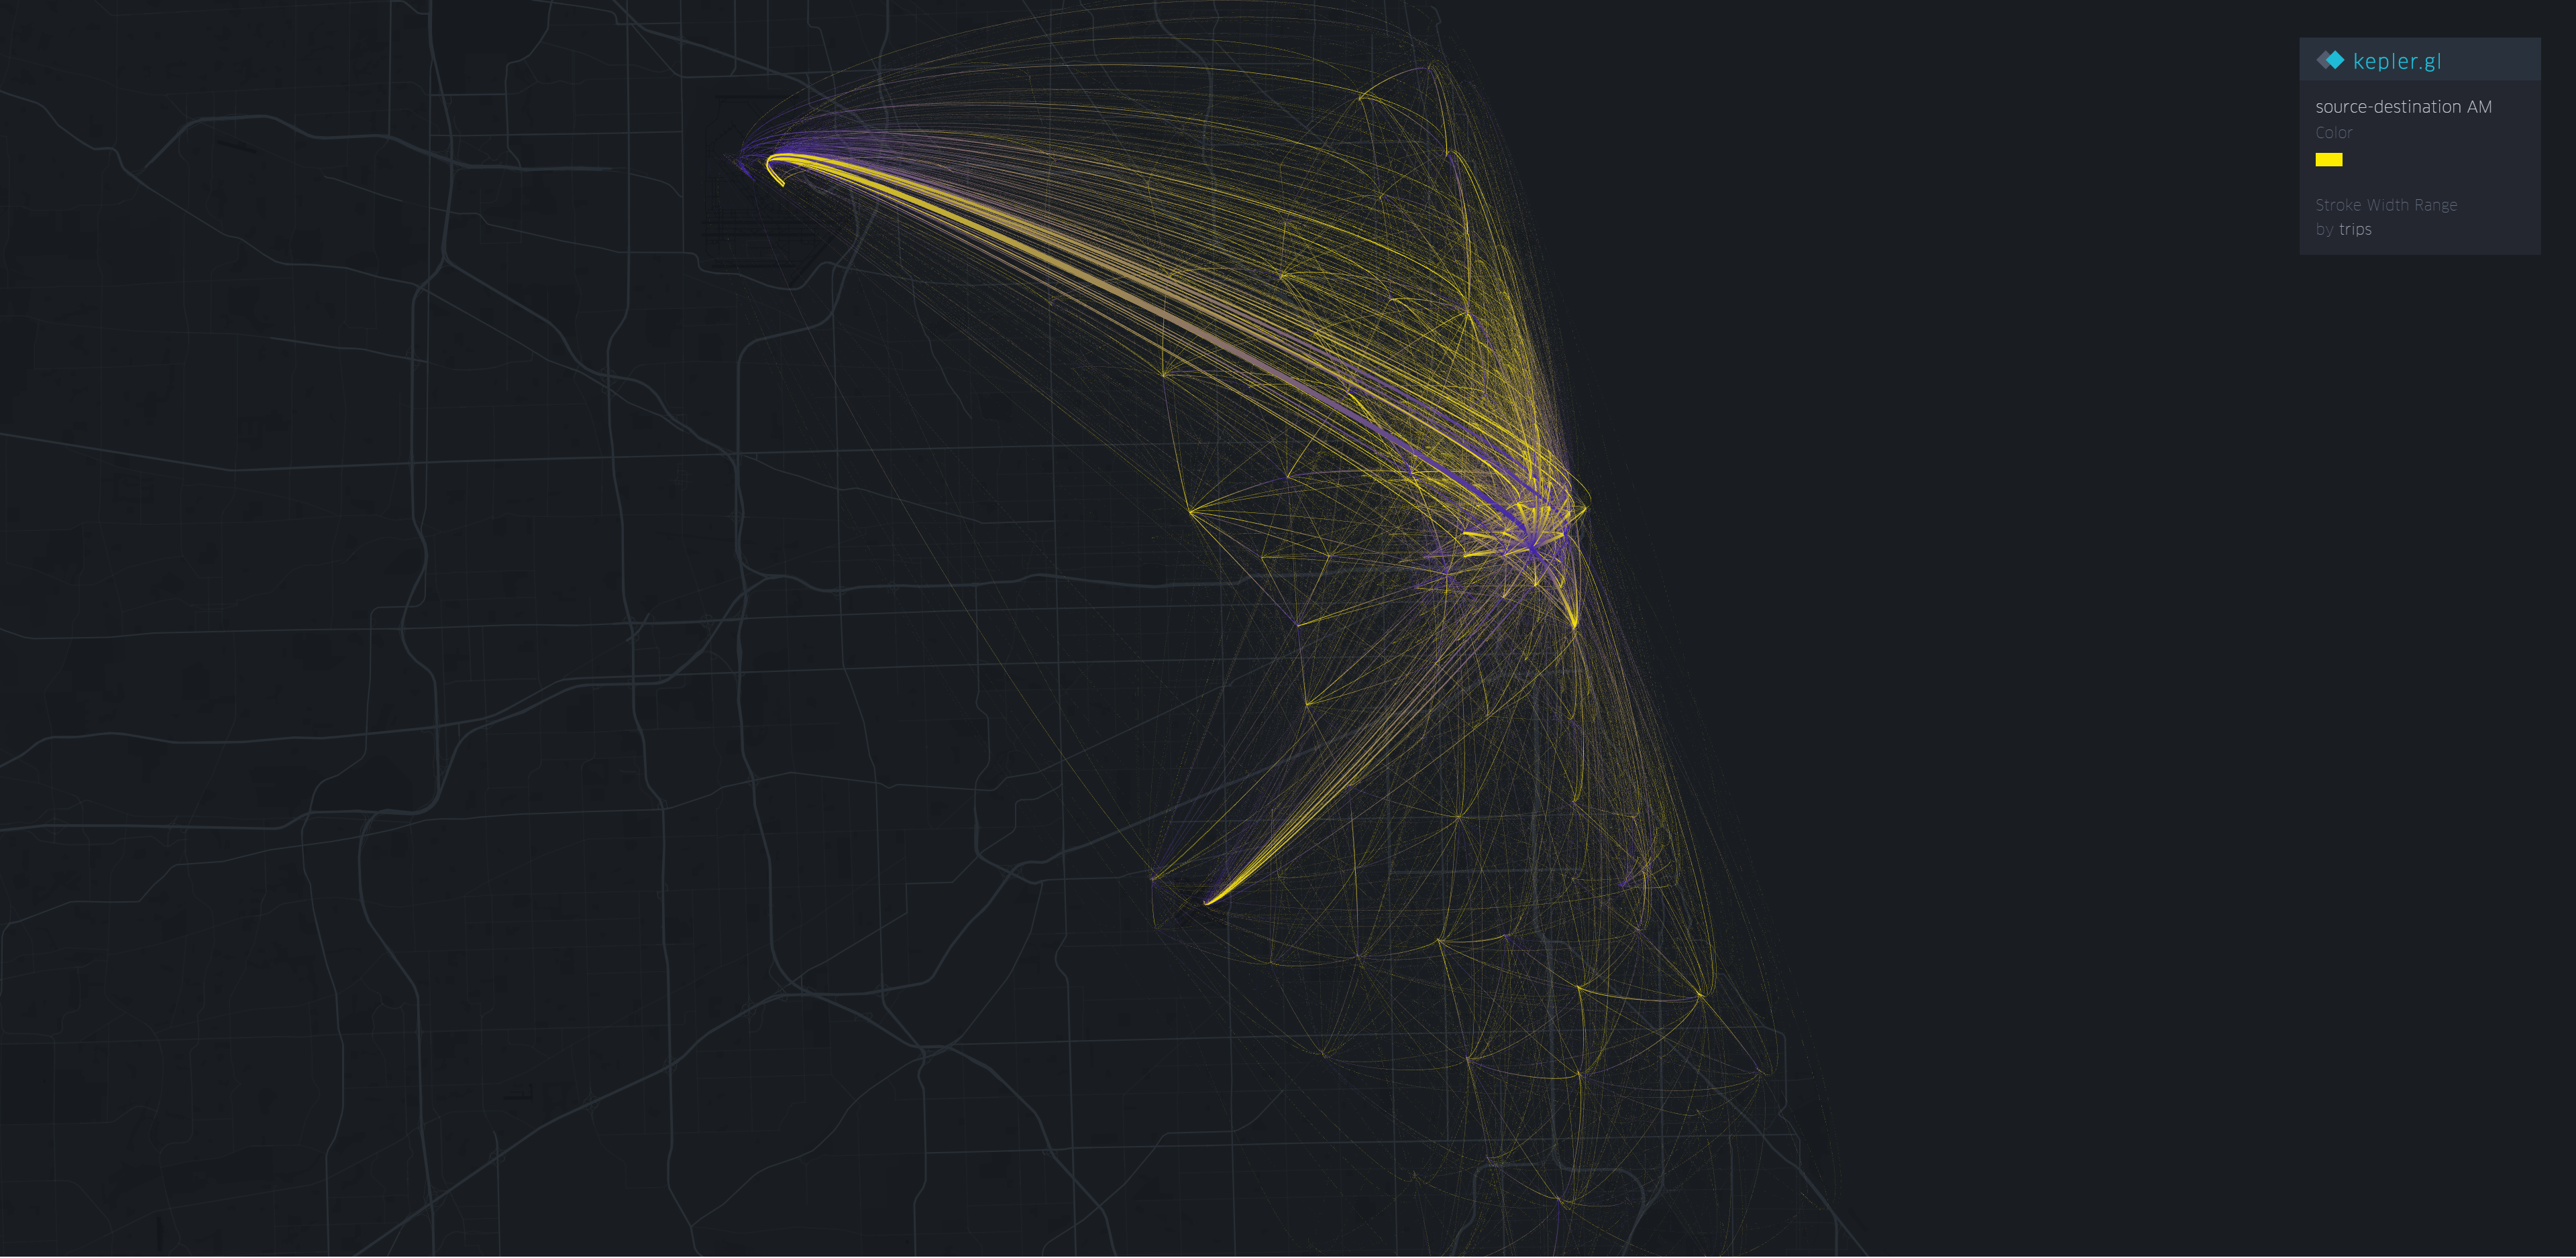

In [7]:
Image("Visuals/Source Destination AM Maps.png")

Similary another example could be investigating the origin of small trips (less than 3 miles) in the citywide hexabin polygons where the height of the bins represent the number of the trips taken in that area. 


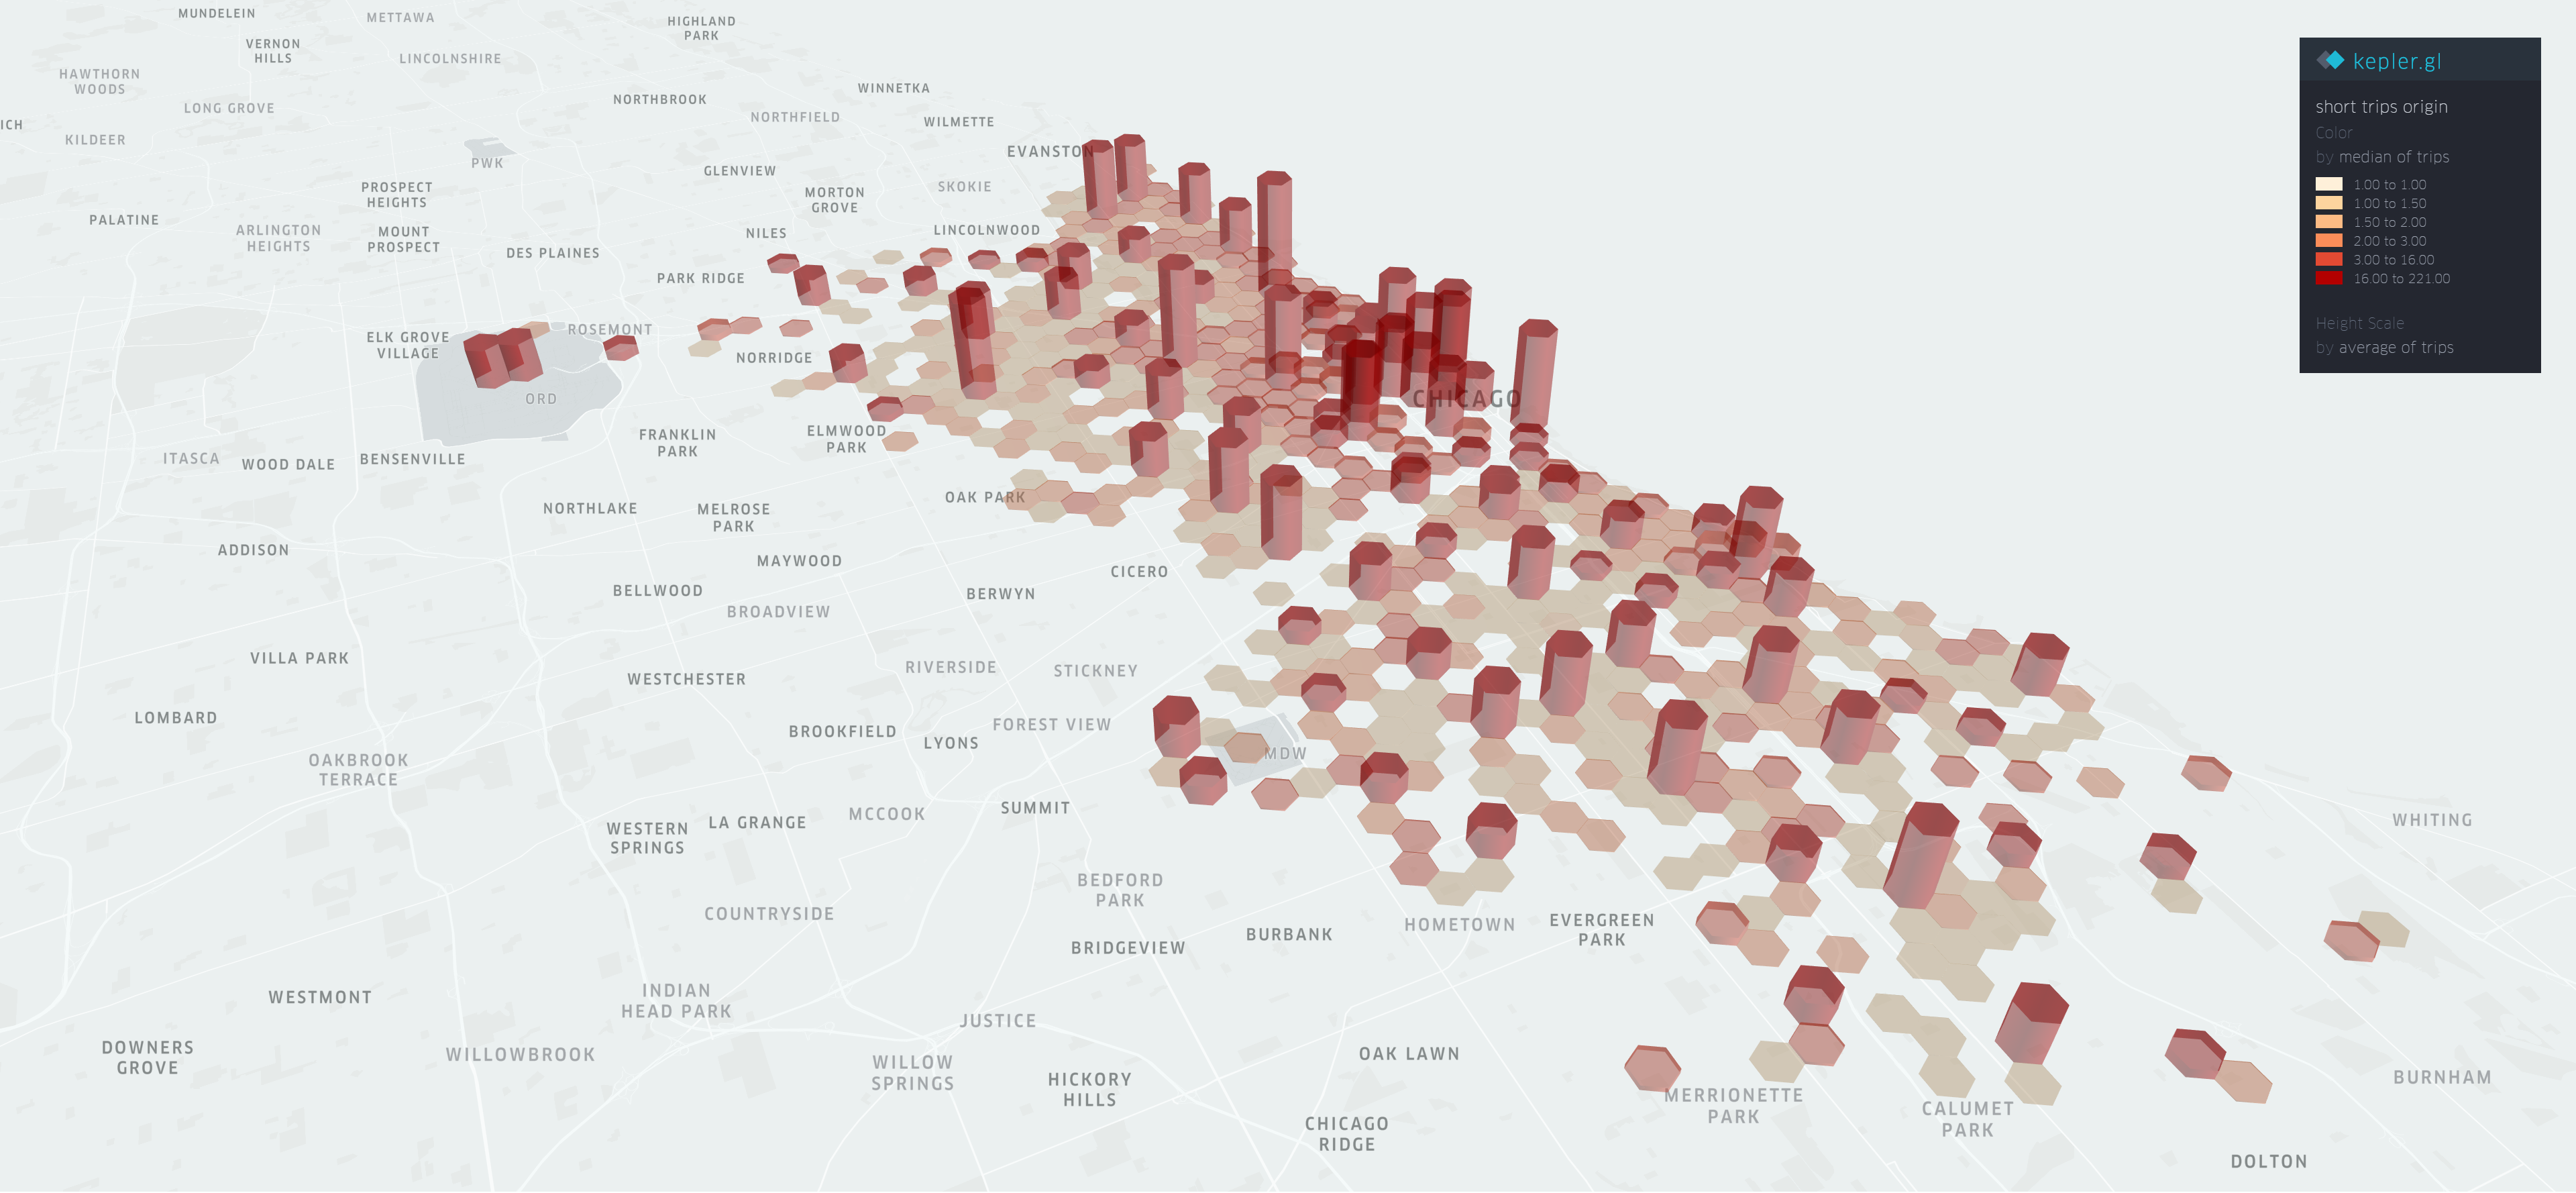

In [9]:
Image("Visuals/Short Trips.png")